In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
stars = pd.read_csv('star_data.csv')
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [18]:
print(stars.shape)

(240, 7)


In [20]:
print(stars['Star type'].unique())


[0 1 2 3 4 5]


In [21]:
print(stars.groupby("Star type").size())

Star type
0    40
1    40
2    40
3    40
4    40
5    40
dtype: int64


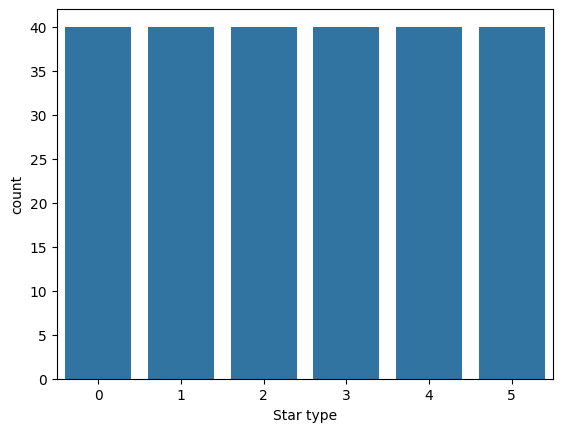

In [15]:
import seaborn as sns
sns.countplot(stars, x="Star type")
plt.show()